<a href="https://colab.research.google.com/github/Walidsati/AAI614_Walid_sati/blob/main/Week%203/Outlier_Detection_With_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load weather_classification_data.csv from github
url = 'https://raw.githubusercontent.com/Walidsati/AAI614_Walid_sati/main/Week%203/weather_classification_data.csv'
df = pd.read_csv(url)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
# extraxt dataframe shape
df.shape

(13200, 11)

In [4]:
# some info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
# check if there any missing values
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [6]:
#Select numerical columns to extraxt outliers
numerical_col = df.select_dtypes(include=np.number).columns
numerical_col

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')

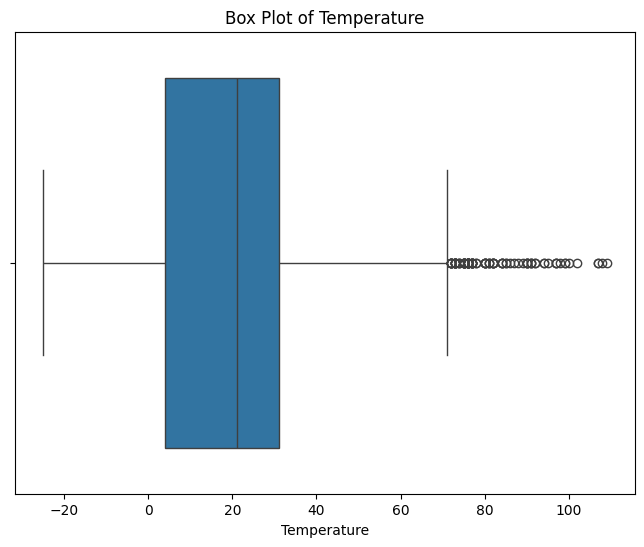

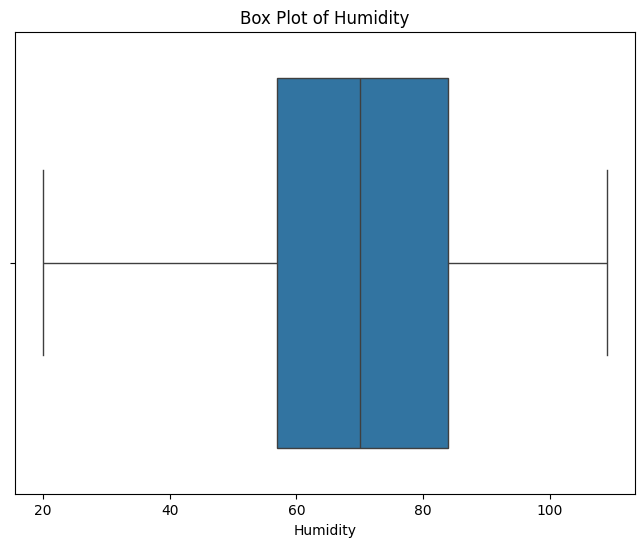

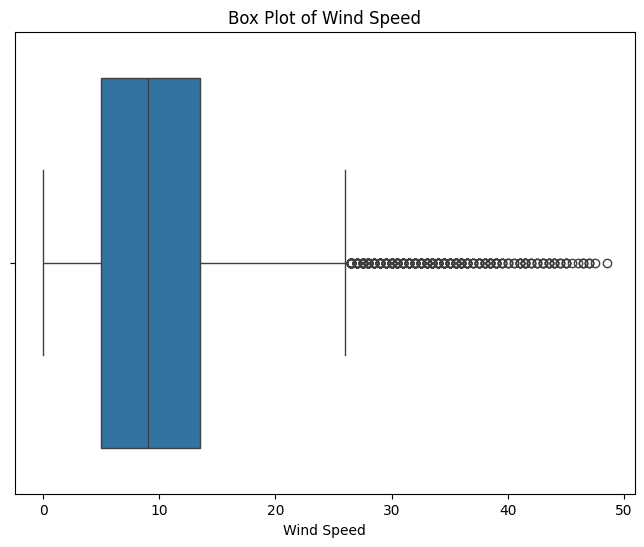

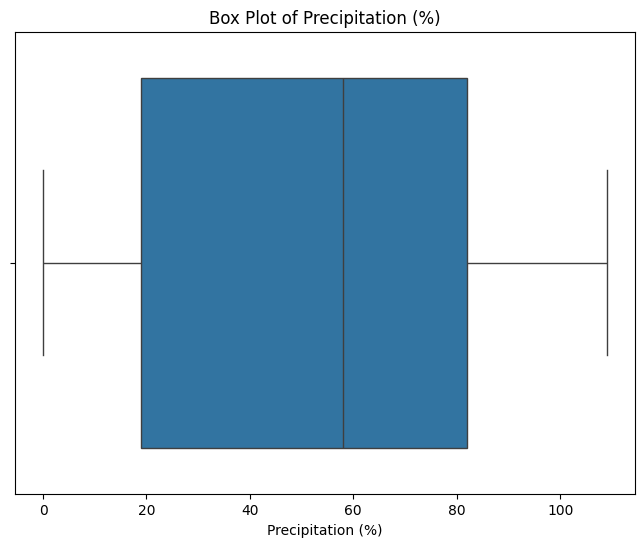

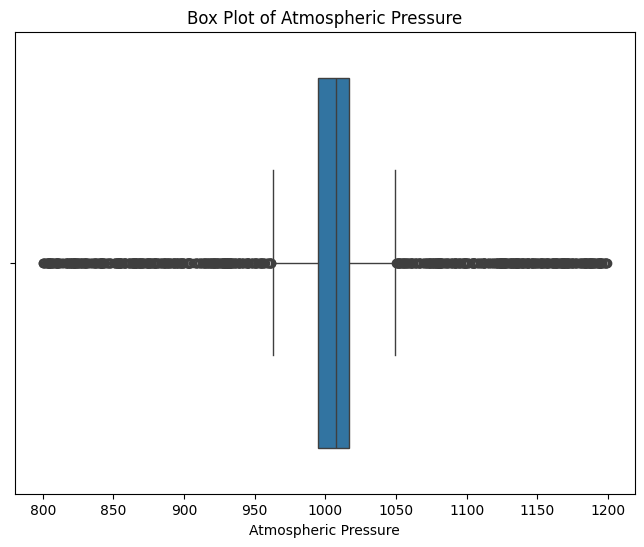

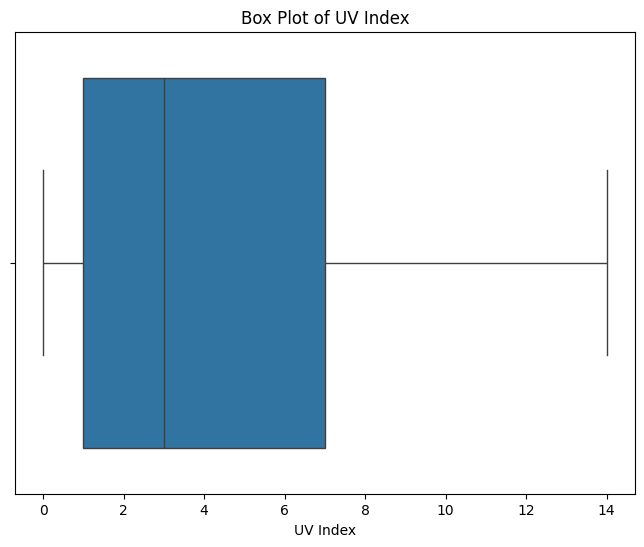

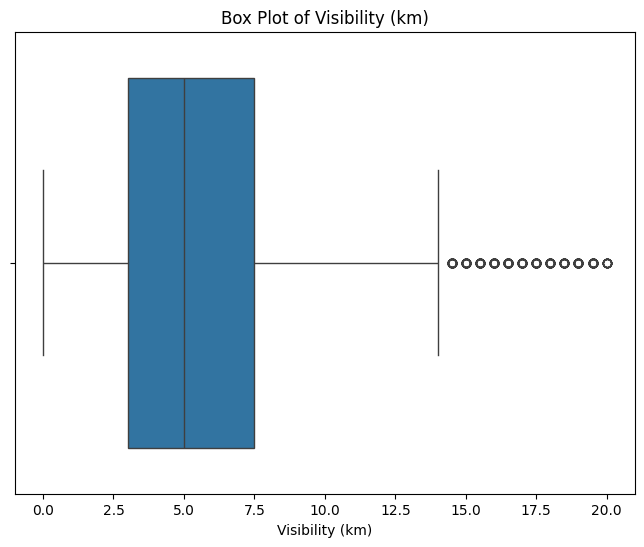

In [7]:
for col in numerical_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [8]:
#Define a function to detect outliers, present bounds, and printing number of outliers in each column
def find_outliers_IQR(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"For column {col}:\n    lower_bound is {lower_bound} \n    upper_bound is: {upper_bound}")
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in numerical_col:
    print(f"Number of outliers in '{col}': {len(find_outliers_IQR(df,col))}")

For column Temperature:
    lower_bound is -36.5 
    upper_bound is: 71.5
Number of outliers in 'Temperature': 92
For column Humidity:
    lower_bound is 16.5 
    upper_bound is: 124.5
Number of outliers in 'Humidity': 0
For column Wind Speed:
    lower_bound is -7.75 
    upper_bound is: 26.25
Number of outliers in 'Wind Speed': 404
For column Precipitation (%):
    lower_bound is -75.5 
    upper_bound is: 176.5
Number of outliers in 'Precipitation (%)': 0
For column Atmospheric Pressure:
    lower_bound is 961.8412499999998 
    upper_bound is: 1049.7312500000003
Number of outliers in 'Atmospheric Pressure': 927
For column UV Index:
    lower_bound is -8.0 
    upper_bound is: 16.0
Number of outliers in 'UV Index': 0
For column Visibility (km):
    lower_bound is -3.75 
    upper_bound is: 14.25
Number of outliers in 'Visibility (km)': 383


In [9]:
# define new funtion to remove outliers
def remove_outliers_IQR(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

df_no_outliers = df.copy()
for col in numerical_col:
    df_no_outliers = remove_outliers_IQR(df_no_outliers, col)

print(f"Shape of the DataFrame after outlier removal: {df_no_outliers.shape}")

Shape of the DataFrame after outlier removal: (11586, 11)


In [10]:
removed_outliers = df.shape[0] - df_no_outliers.shape[0]
print(f"Number of outliers removed : {removed_outliers}")

Number of outliers removed : 1614
